<a href="https://colab.research.google.com/github/mrmamadi/regression10/blob/Notebook/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Data cleaning and EDA



## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Data


In [0]:
train_set = pd.read_csv('/content/Train.csv')
unseen_set = pd.read_csv('/content/Test.csv')
riders_set = pd.read_csv('/content/Riders.csv')

In [4]:
train_set.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [5]:
train_set.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


White spaces in column name are replaced with underscores to prepare for use in OLS and because it is good practice. To confirm that order number can be used as the identifer variable, the number of unique entries are checked. The number of unique entries is equal to the number of rows in the table. The order number can be set as the index of the table.

The count values for the "Temperature" and "Precipitation in millimeters" columns are less than 21201. This shows that there are data points missing from these columns. 

In [19]:
train_set[['Order No']].nunique()

KeyError: ignored

In [6]:
# Replace white spaces in column headings with underscore
train_set.columns = [col.replace(" ","_") for col in train_set.columns] 

# Set Order No column as index
train_set = train_set.set_index('Order_No')
train_set.head()

,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


##### Taking care of missing data
In imputing the missing data for the temperature columns, the distributions of the unseen and training data sets are plotted. The data can be approximated to be normal as shown by the plots below. The means and medians are similar thus the choice as imputation values should not adversely affect the modelling. There are also no outliers observed and the mean is selected. 

<font color='red'> Are nulls in precipitation column empty because data wasnt recorded, or because it didnt rain? <br>
Consider grouping temperature imputation by time
<font color='red'>

In [11]:
train_set.isnull().sum()

User_Id                                          0
Vehicle_Type                                     0
Platform_Type                                    0
Personal_or_Business                             0
Placement_-_Day_of_Month                         0
Placement_-_Weekday_(Mo_=_1)                     0
Placement_-_Time                                 0
Confirmation_-_Day_of_Month                      0
Confirmation_-_Weekday_(Mo_=_1)                  0
Confirmation_-_Time                              0
Arrival_at_Pickup_-_Day_of_Month                 0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)             0
Arrival_at_Pickup_-_Time                         0
Pickup_-_Day_of_Month                            0
Pickup_-_Weekday_(Mo_=_1)                        0
Pickup_-_Time                                    0
Arrival_at_Destination_-_Day_of_Month            0
Arrival_at_Destination_-_Weekday_(Mo_=_1)        0
Arrival_at_Destination_-_Time                    0
Distance_(KM)                  

In [10]:
train_set[['Temperature', 'Precipitation_in_millimeters']].isnull().sum()/21201*100

Temperature                     20.593368
Precipitation_in_millimeters    97.396349
dtype: float64

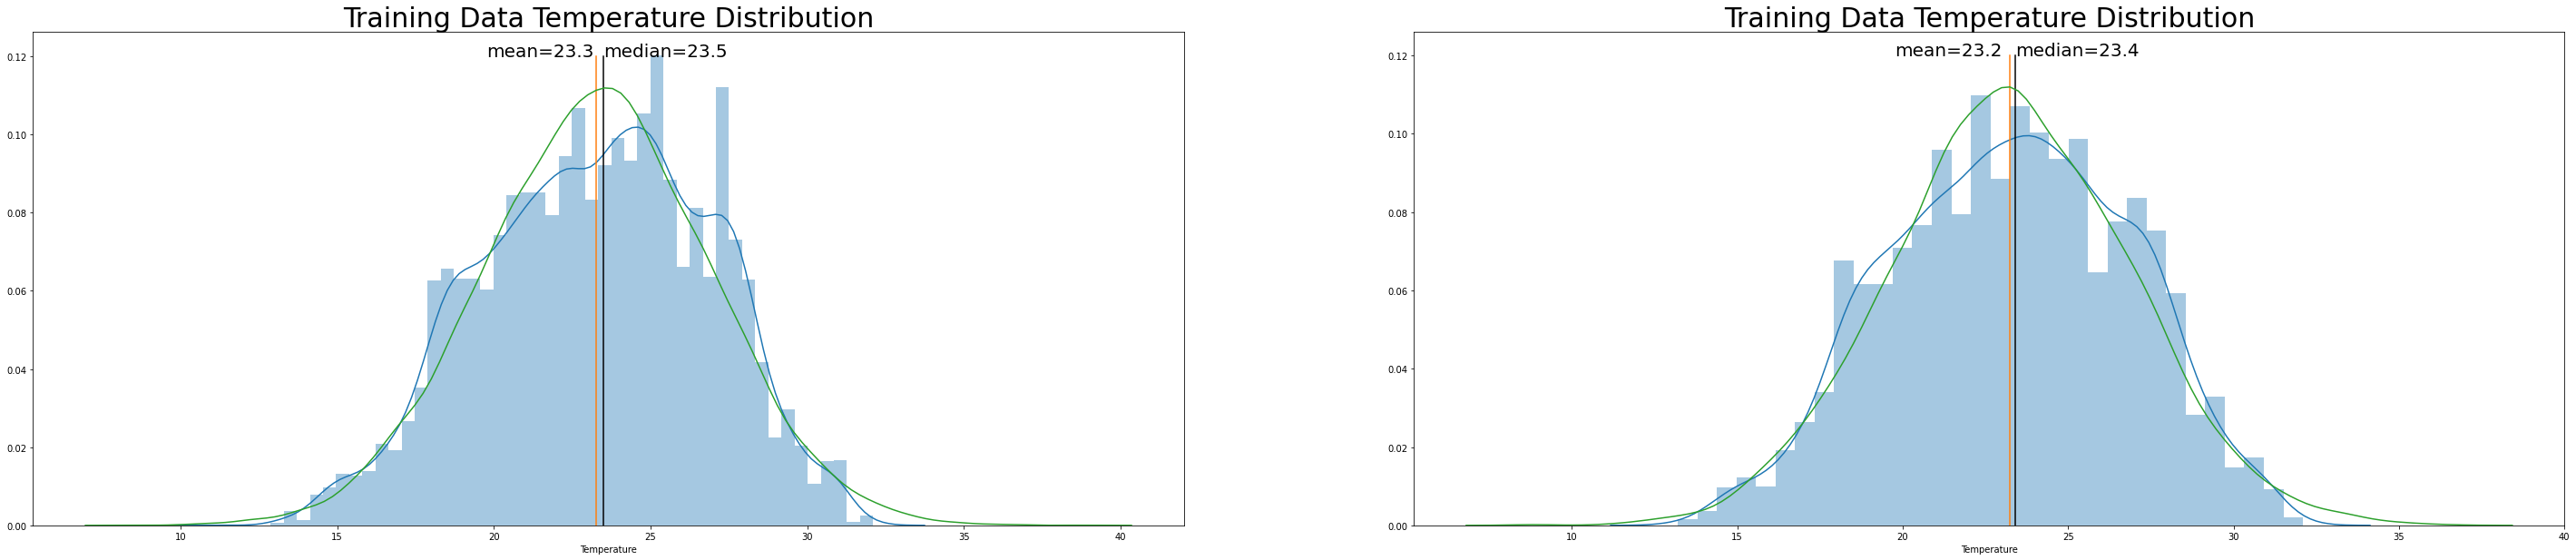

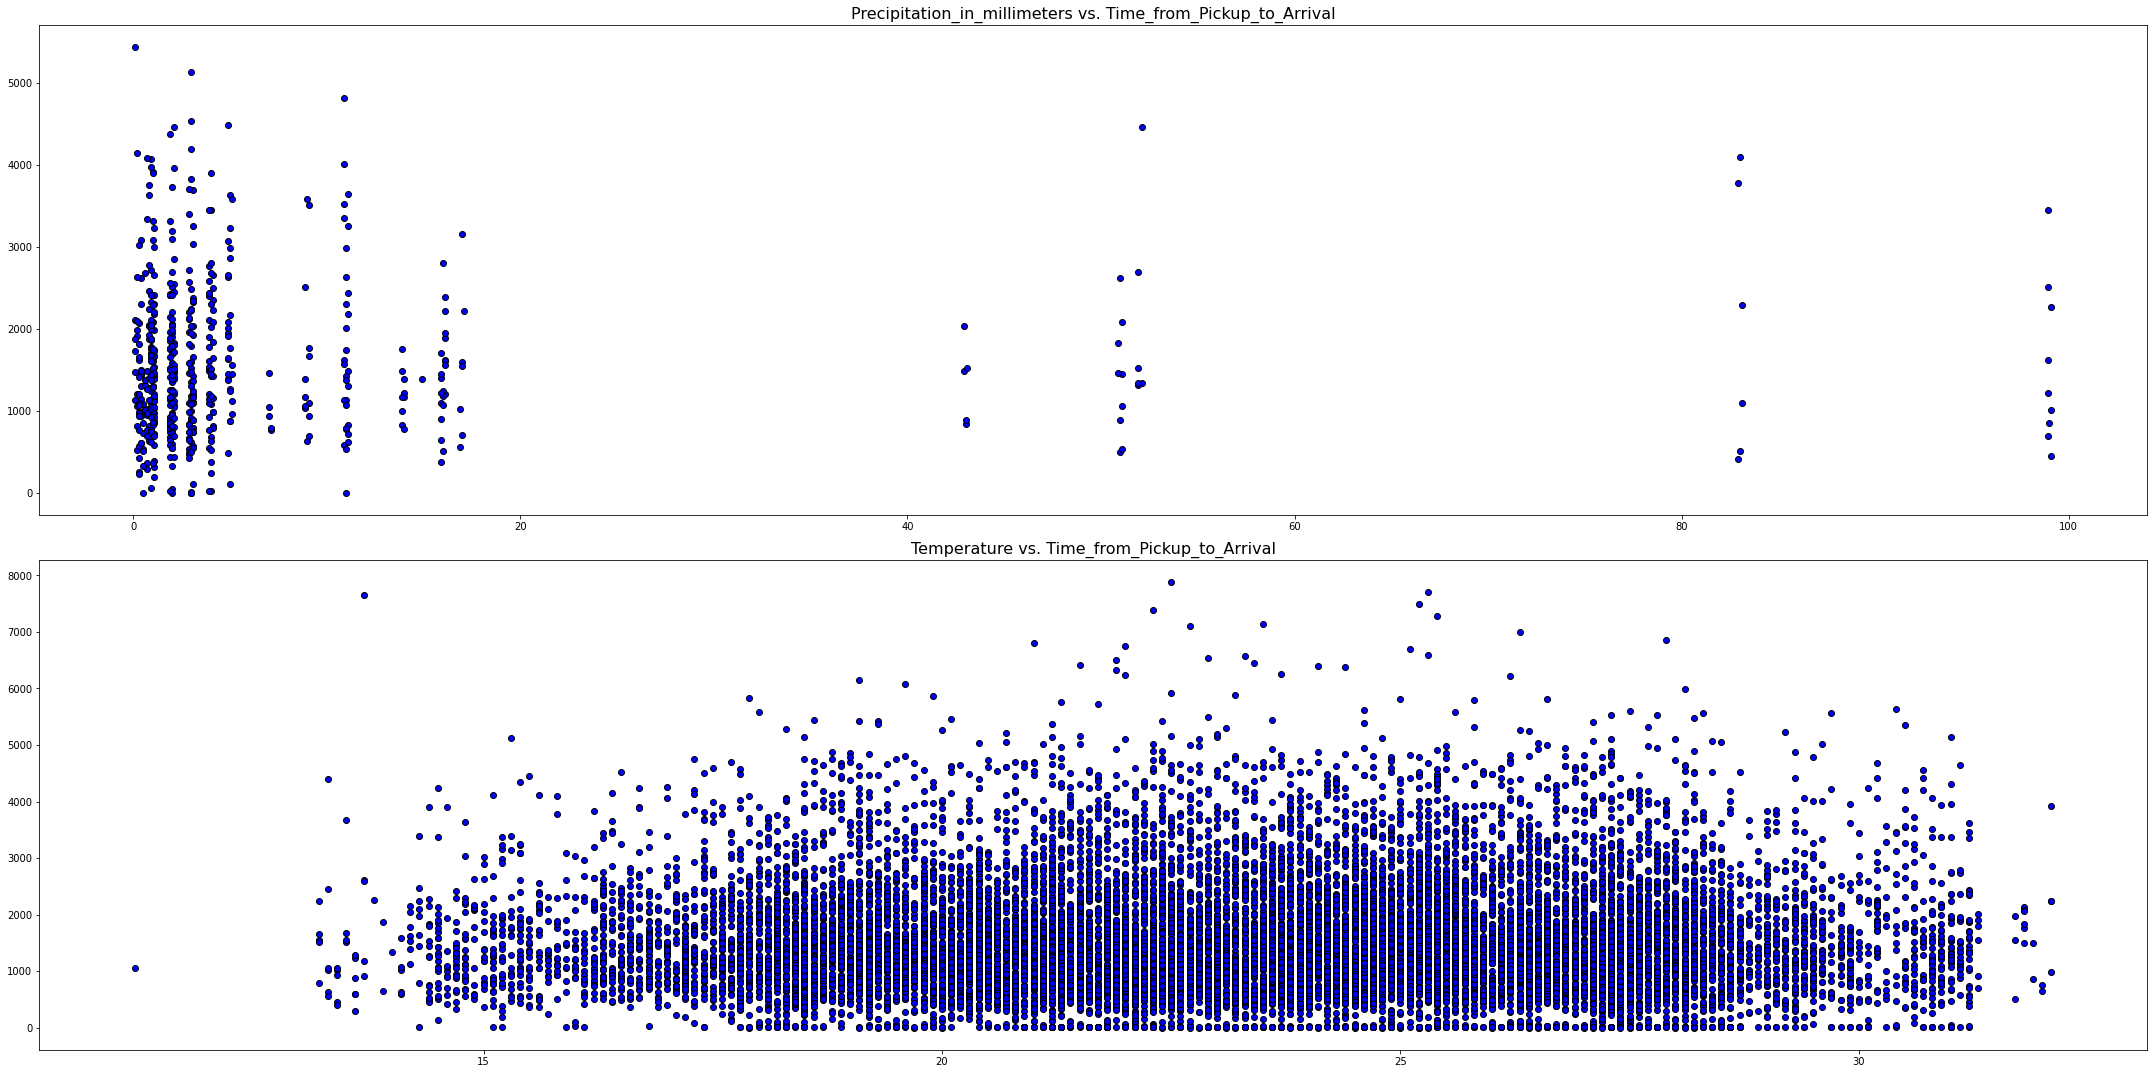

In [12]:
# @title Check temperature columns
from matplotlib import rcParams

rcParams['figure.figsize'] = 50, 10

f, axes = plt.subplots(1, 2)

temps = train_set['Temperature']
sns.distplot(temps, ax=axes[0])
axes[0].plot([temps.mean(), temps.mean()],[0,0.12])
axes[0].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[0].text(x=temps.median(),y=.12, s=f'median={temps.median()}', fontsize=20)
axes[0].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[0])
axes[0].set_title('Training Data Temperature Distribution', fontsize=30)

temps = unseen_set['Temperature']
sns.distplot(temps, ax=axes[1])
axes[1].plot([temps.mean(), temps.mean()],[0,0.12])
axes[1].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[1].text(temps.median(),.12, f'median={temps.median()}', fontsize=20)
axes[1].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[1])
axes[1].set_title('Training Data Temperature Distribution', fontsize=30)
plt.show()

fig, axs = plt.subplots(2,1, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.iloc[:,-8:-6].columns):
    axs[index-1].set_title("{} vs. Time_from_Pickup_to_Arrival".format(column),fontsize=16)
    axs[index-1].scatter(x=train_set.iloc[:,-8:-6][column],y=train_set['Time_from_Pickup_to_Arrival'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [13]:
# Replace NaNs in Temperature with column specific mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imputer.fit(train_set.iloc[:,-8:-7])
train_set.iloc[:,-8:-7] = imputer.transform(train_set.iloc[:,-8:-7])

imputer2.fit(train_set.iloc[:,-7:-6])
train_set.iloc[:,-7:-6] = imputer2.transform(train_set.iloc[:,-7:-6])

train_set.head()


,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


### Building a more accurate model!

##### Dealing with categorical columns
The `.info` method of the dataframe is called to identify categorical columns. Categorical columns are shown as Dtype "object".


In [0]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order_No                                   21201 non-null  object 
 1   User_Id                                    21201 non-null  object 
 2   Vehicle_Type                               21201 non-null  object 
 3   Platform_Type                              21201 non-null  int64  
 4   Personal_or_Business                       21201 non-null  object 
 5   Placement_-_Day_of_Month                   21201 non-null  int64  
 6   Placement_-_Weekday_(Mo_=_1)               21201 non-null  int64  
 7   Placement_-_Time                           21201 non-null  object 
 8   Confirmation_-_Day_of_Month                21201 non-null  int64  
 9   Confirmation_-_Weekday_(Mo_=_1)            21201 non-null  int64  
 10  Confirmation_-_Time   

###### Encoding Categorical Columns
Platform type should not be considered as an ordinal categorical column because it could create a ranking bias. (Does using platform labelled 3 have 3 times more weight than using platform labelled 1? No. Therefore should be one hot encoded)

"Personal_or_Business" not necessary to dummy encode personal or business, use label encoder or do it manually (Bussiness =0)

Categorical with High Cardinality.Need to deal with categorical columns with high cardinality ('Order_No, 'User_Id','Rider_Id'). Can't One-hot encode. Number of parameters will exceed number of observations... Lead to unidentifiable model
- Consider creating a column to see the total number of orders made by the specific user. 
- Removed the 'Rider Id' column and replaced it with average rating


<font color='red'> Put all three barplots in 1 figure <br> See time taken vs platform type curve </font>


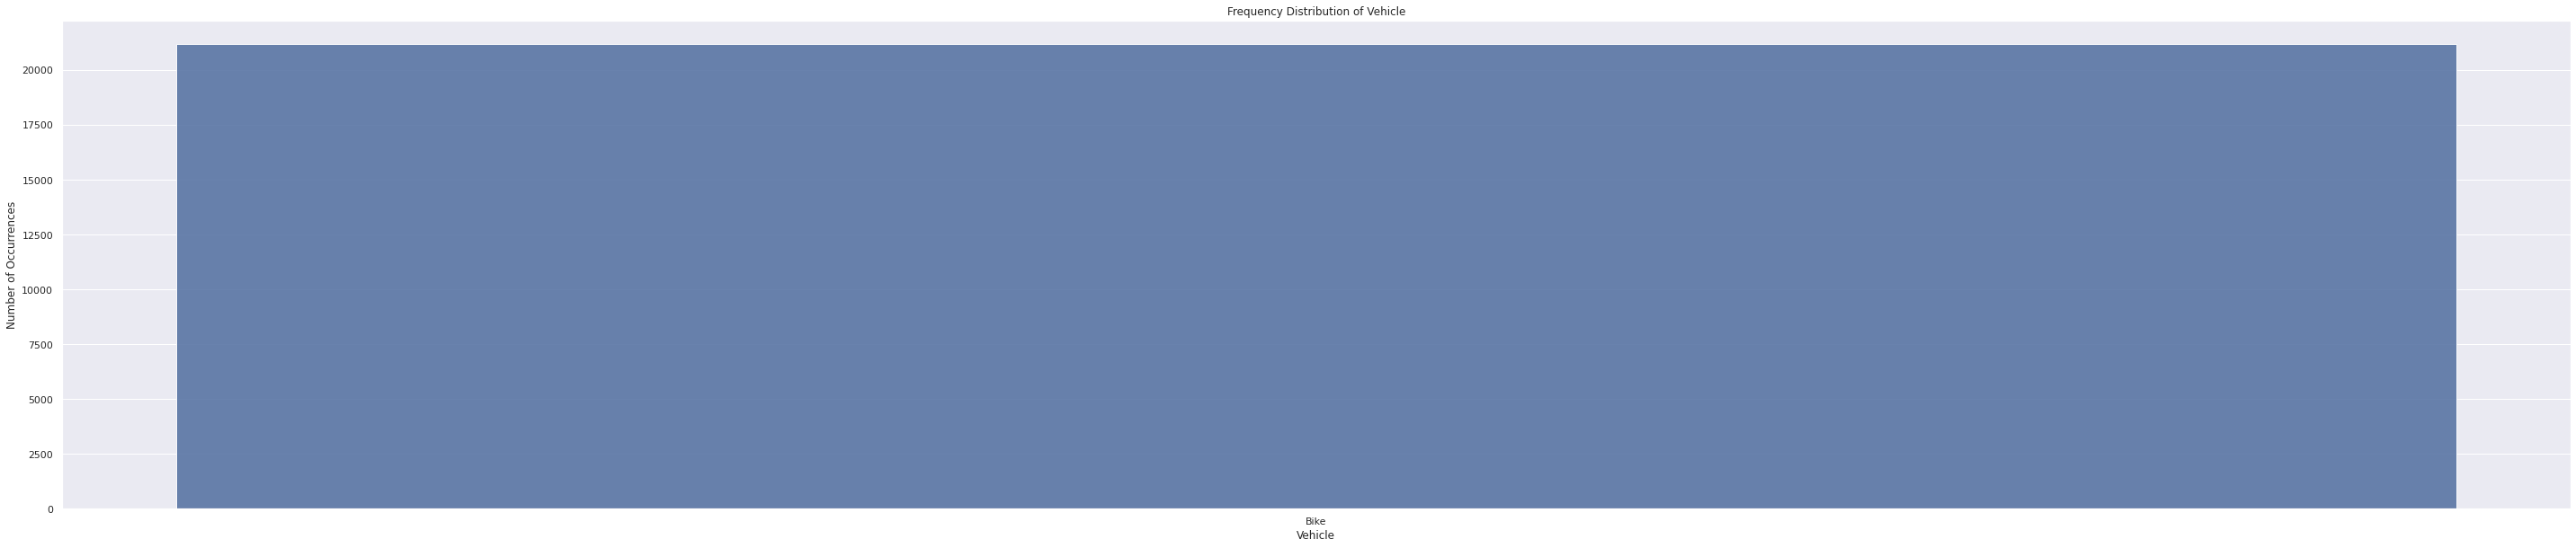

In [15]:
vehicle_count = train_set['Vehicle_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vehicle_count.index, vehicle_count.values, alpha=0.9)
plt.title('Frequency Distribution of Vehicle')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle', fontsize=12)
plt.show()

Stated in information on Zindy that only vehicle type used is a bike

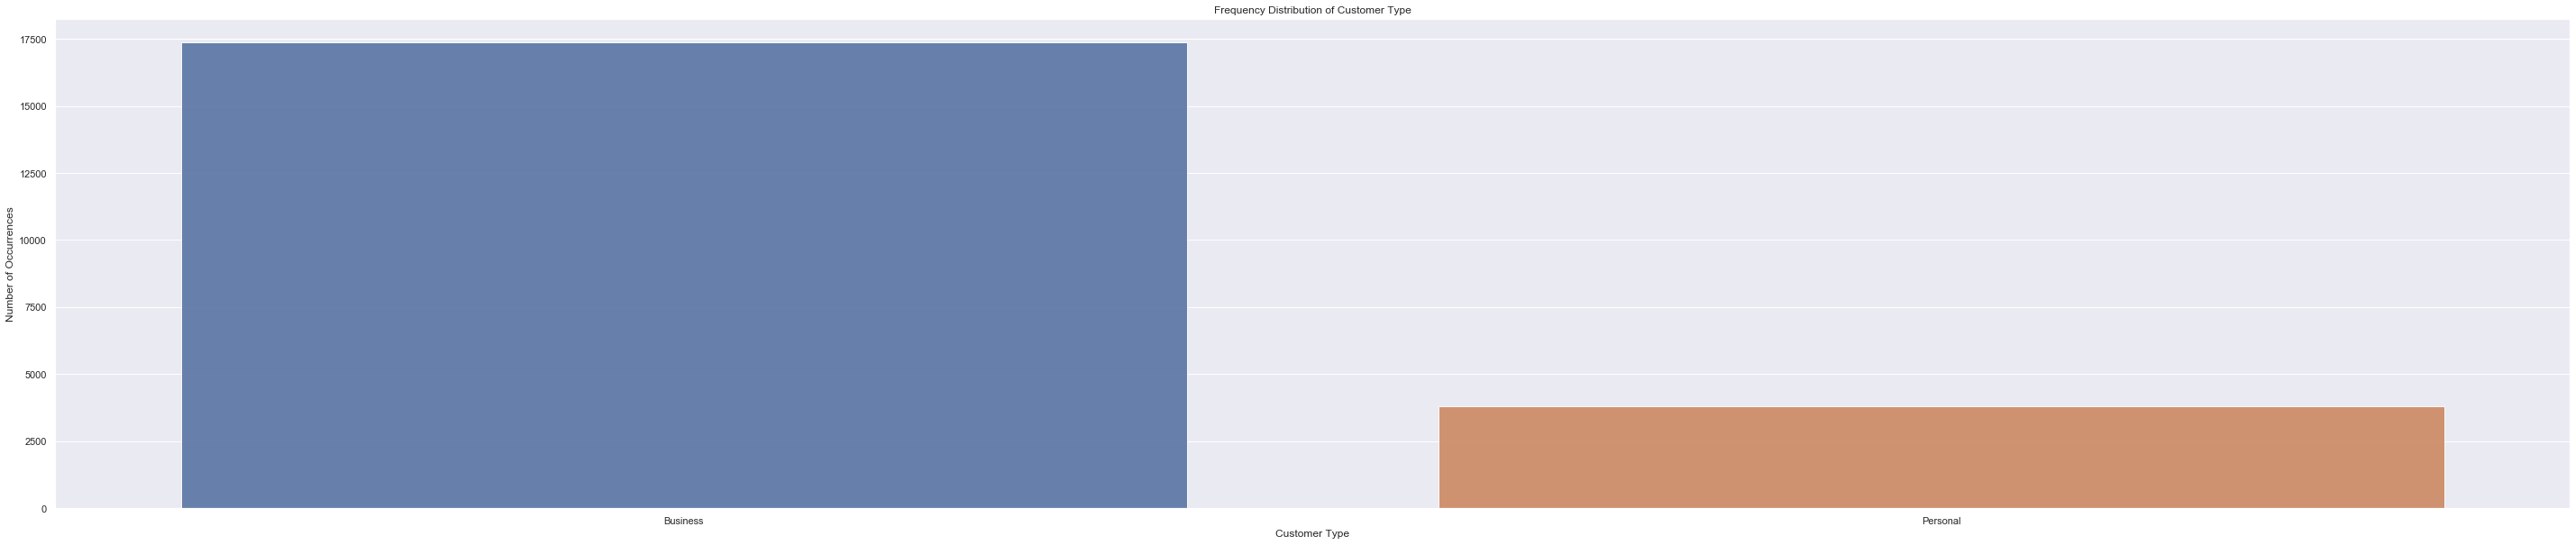

In [0]:
custtype_count = train_set['Personal_or_Business'].value_counts()
sns.set(style="darkgrid")
sns.barplot(custtype_count.index, custtype_count.values, alpha=0.9)
plt.title('Frequency Distribution of Customer Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Customer Type', fontsize=12)
plt.show()

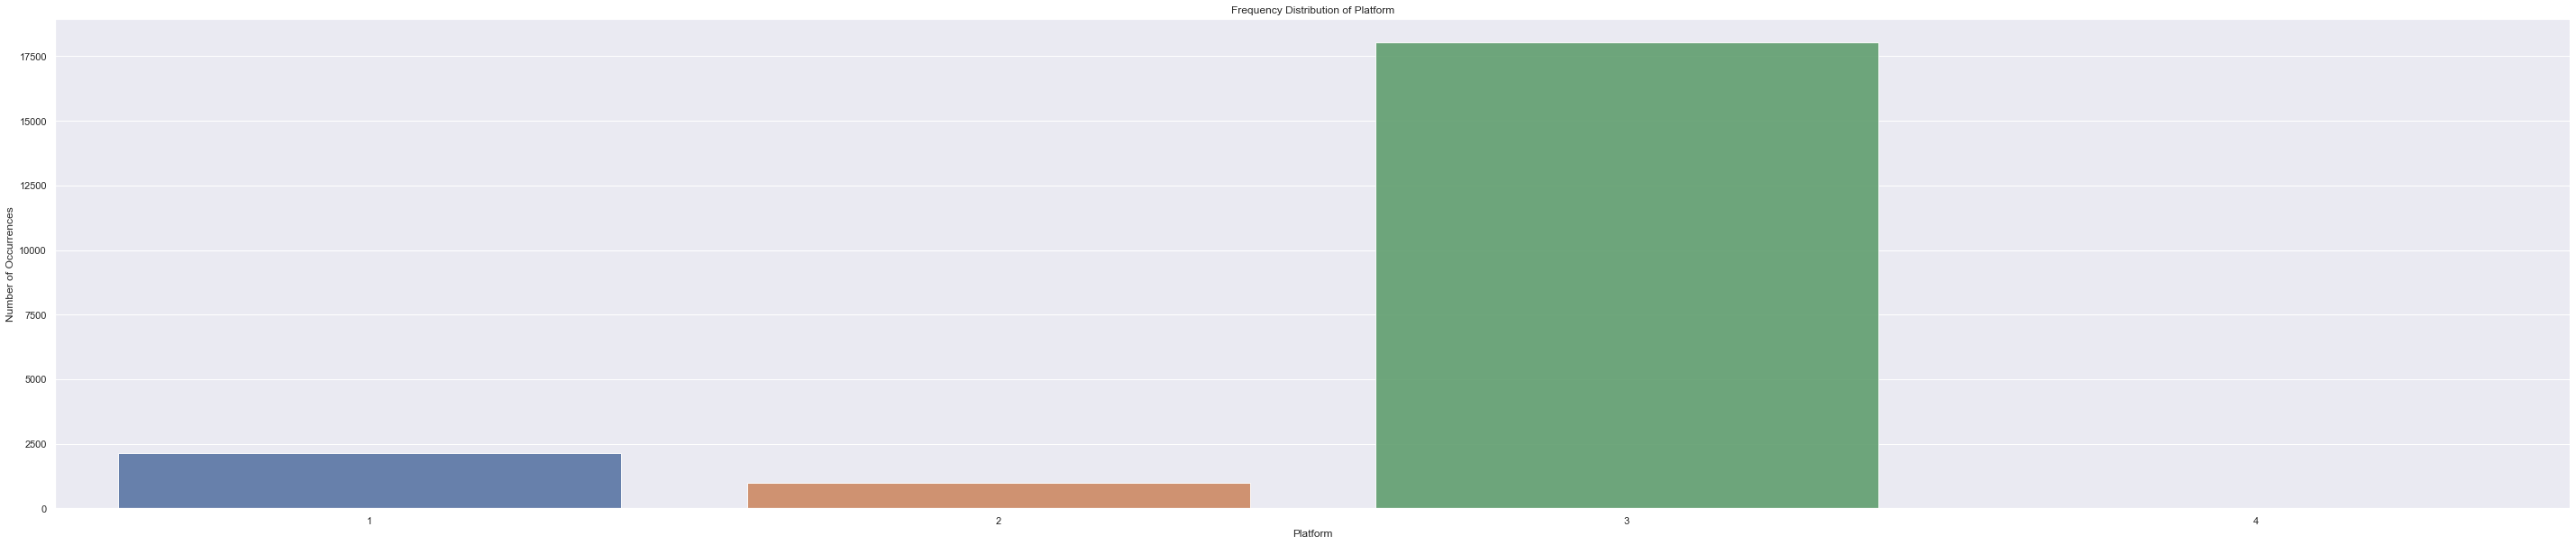

In [0]:
platform_count = train_set['Platform_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(platform_count.index, platform_count.values, alpha=0.9)
plt.title('Frequency Distribution of Platform')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.show()

In [16]:
# Dummy encode catergorical values in 'Vehicle Type' and 'Personal or Business' columns

train_set = pd.get_dummies(train_set, columns = ['Personal_or_Business', 'Vehicle_Type', 'Platform_Type'], drop_first=True)
train_set.head()

,User_Id,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4
Order_No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0,0,1,0
Order_No_25375,User_Id_2285,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1,0,1,0
Order_No_1899,User_Id_265,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0,0,1,0
Order_No_9336,User_Id_1402,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0,0,1,0
Order_No_27883,User_Id_1737,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1,0,0,0


In [20]:
# Order No is the main identifier variable for each row
# Set Order No column as index

#train_set[['User_Id','Rider_Id']].head()
train_set[['User_Id','Rider_Id']].nunique()

User_Id     3186
Rider_Id     924
dtype: int64

Can I replace User_Id with the number of times it appears (orders it made)? Or rather as a fraction of total orders made in the period?


In [21]:
user_id = (train_set.groupby('User_Id').count().iloc[:,0])
user_id.describe()

count    3186.000000
mean        6.654426
std        24.982798
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       645.000000
Name: Placement_-_Day_of_Month, dtype: float64

In [22]:
train_set['Total_No_Orders'] = [float(user_id[train_set['User_Id'][i]]) for i in range(len(train_set))]
train_set = train_set.drop(['User_Id'], axis='columns')
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders
Order_No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0,0,1,0,182.0
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1,0,1,0,8.0
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0,0,1,0,162.0
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0,0,1,0,74.0
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1,0,0,0,1.0


Can I replace Rider_Id with Rider Rating?

In [23]:
train_set['Rider_Average_Rating'] = [riders_set[riders_set['Rider Id'] == train_set['Rider_Id'][i]]['Average_Rating'].iloc[0] for i in range(len(train_set))]
train_set = train_set.drop(['Rider_Id'], axis=1)
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,0,0,1,0,182.0,13.8
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,1,0,1,0,8.0,13.6
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,0,0,1,0,162.0,12.5
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,0,0,1,0,74.0,14.5
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,1,0,0,0,1.0,14.1


Let's convert all time to 24 hour format

In [26]:
train_set['Placement_-_Time'] = pd.to_datetime(train_set['Placement_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Confirmation_-_Time'] = pd.to_datetime(train_set['Confirmation_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(train_set['Arrival_at_Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Pickup_-_Time'] = pd.to_datetime(train_set['Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Arrival_at_Destination_-_Time'] = pd.to_datetime(train_set['Arrival_at_Destination_-_Time'])#.dt.time#strftime('%H:%M:%S')

train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,2020-05-30 09:35:46,9,5,2020-05-30 09:40:10,9,5,2020-05-30 10:04:47,9,5,2020-05-30 10:27:30,9,5,2020-05-30 10:39:55,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,0,0,1,0,182.0,13.8
Order_No_25375,12,5,2020-05-30 11:16:16,12,5,2020-05-30 11:23:21,12,5,2020-05-30 11:40:22,12,5,2020-05-30 11:44:09,12,5,2020-05-30 12:17:22,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,1,0,1,0,8.0,13.6
Order_No_1899,30,2,2020-05-30 12:39:25,30,2,2020-05-30 12:42:44,30,2,2020-05-30 12:49:34,30,2,2020-05-30 12:53:03,30,2,2020-05-30 13:00:38,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,0,0,1,0,162.0,12.5
Order_No_9336,15,5,2020-05-30 09:25:34,15,5,2020-05-30 09:26:05,15,5,2020-05-30 09:37:56,15,5,2020-05-30 09:43:06,15,5,2020-05-30 10:05:27,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,0,0,1,0,74.0,14.5
Order_No_27883,13,1,2020-05-30 09:55:18,13,1,2020-05-30 09:56:18,13,1,2020-05-30 10:03:53,13,1,2020-05-30 10:05:23,13,1,2020-05-30 10:25:37,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,1,0,0,0,1.0,14.1


Perhaps use an arbitrary year and month (with 31 days) and create a yyyy:mm:dd hh:mm:ss datetime? With '...Day_of_Month' as the day and '...Time' as the 24 hour time. Then calculate difference to account for instances where day of placement != day of confirmation

Using following functions treat year and month as arbitrary, and assume of time based on how they're entered into equation

In [27]:
train_set['Placement_-_Time'] = [train_set['Placement_-_Time'][i].replace(month=5, day=train_set['Placement_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Confirmation_-_Time'] = [train_set['Confirmation_-_Time'][i].replace(month=5, day=train_set['Confirmation_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Arrival_at_Pickup_-_Time'] = [train_set['Arrival_at_Pickup_-_Time'][i].replace(month=5, day=train_set['Arrival_at_Pickup_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Pickup_-_Time'] = [train_set['Pickup_-_Time'][i].replace(month=5, day=train_set['Pickup_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Arrival_at_Destination_-_Time'] = [train_set['Arrival_at_Destination_-_Time'][i].replace(month=5, day=train_set['Arrival_at_Destination_-_Day_of_Month'][i]) for i in range(len(train_set))]

# Added data from '...Day_of_Month' columns to '...Time' columns (also affected by day on which order placed, confirmed etc), so can be removed
train_set = train_set.drop(['Placement_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Pickup_-_Day_of_Month'], axis=1)
train_set = train_set.drop(['Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Weekday_(Mo_=_1)'], axis=1)

# Information in Arrival_at_Destination DAy_of_month and _weekday column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
train_set = train_set.drop(['Arrival_at_Destination_-_Day_of_Month'], axis=1)
train_set = train_set.drop(['Arrival_at_Destination_-_Weekday_(Mo_=_1)'], axis=1)


train_set.head()

,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,
Order_No_4211,2020-05-09 09:35:46,2020-05-09 09:40:10,2020-05-09 10:04:47,2020-05-09 10:27:30,2020-05-09 10:39:55,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,0,0,1,0,182.0,13.8
Order_No_25375,2020-05-12 11:16:16,2020-05-12 11:23:21,2020-05-12 11:40:22,2020-05-12 11:44:09,2020-05-12 12:17:22,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,1,0,1,0,8.0,13.6
Order_No_1899,2020-05-30 12:39:25,2020-05-30 12:42:44,2020-05-30 12:49:34,2020-05-30 12:53:03,2020-05-30 13:00:38,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,0,0,1,0,162.0,12.5
Order_No_9336,2020-05-15 09:25:34,2020-05-15 09:26:05,2020-05-15 09:37:56,2020-05-15 09:43:06,2020-05-15 10:05:27,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,0,0,1,0,74.0,14.5
Order_No_27883,2020-05-13 09:55:18,2020-05-13 09:56:18,2020-05-13 10:03:53,2020-05-13 10:05:23,2020-05-13 10:25:37,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,1,0,0,0,1.0,14.1


Information from Day_of_month columns now in Time columns. Let's create relevant columns to show the passage of time

In [28]:
train_set['Time_from_Placement_to_Confirmation'] = [(train_set['Confirmation_-_Time'][i] - train_set['Placement_-_Time'][i]).total_seconds() for i in range(len(train_set))]
train_set['Time_from_Confirmation_to_Arrival_at_Pickup'] = [(train_set['Arrival_at_Pickup_-_Time'][i] - train_set['Confirmation_-_Time'][i]).total_seconds() for i in range(len(train_set))]
train_set['Time_from_Arrival_at_Pickup_to_Pickup'] = [(train_set['Pickup_-_Time'][i] - train_set['Arrival_at_Pickup_-_Time'][i]).total_seconds() for i in range(len(train_set))]

# Information from '...Time' columns now represented in '...from...to...' columns, so can be dropped
train_set = train_set.drop(['Confirmation_-_Time','Placement_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Pickup_-_Time'], axis=1)

# Information in Arrival_at_Destination_-_Time column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
train_set = train_set.drop(['Arrival_at_Destination_-_Time'], axis=1)
train_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
Order_No,,,,,,,,,,,,,,,,,
Order_No_4211,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,0,0,1,0,182.0,13.8,264.0,1477.0,1363.0
Order_No_25375,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,1,0,1,0,8.0,13.6,425.0,1021.0,227.0
Order_No_1899,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,0,0,1,0,162.0,12.5,199.0,410.0,209.0
Order_No_9336,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,0,0,1,0,74.0,14.5,31.0,711.0,310.0
Order_No_27883,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,1,0,0,0,1.0,14.1,60.0,455.0,90.0


### Dealing with duplicated data
Folowing columns are found to be identical
['Arrival_at_Pickup_-_Weekday_(Mo_=_1)',
 'Arrival_at_Pickup_-_Day_of_Month',
 'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
 'Pickup_-_Day_of_Month',
 'Pickup_-_Weekday_(Mo_=_1)',
 'Arrival_at_Destination_-_Day_of_Month']

 Consider removing duplicate columns which represent predictor variables.
There is no difference in the day between the confirmation of the order, the arrival of the parcel at pickup, the day of pickup (X-values). The parcels all arrive at destination on the same day. Are they therefore the same variable? And can I remove the appropriate columns from the dependent variables? Dealing with datetime varialble columns? Use to create relative columns for 'Time from Placement to Confirmation', 'Time from Confirmation to Arrival at Pickup', 'Time from Arrival at Pickup to Pickup'?

<font color='red'> Replace column names with underscore column names </font>

In [0]:
#@title  Confirm that columns are similar (And that everything happens in the same day)

def print_row(df, column1, column2, additional_text = ""):
  """
  function prints out number of rows containing different values between 
  column1 and column2 of dataframe df
  """
  diff_rows = (df[df[column1] != df[column2]]).shape[0]
  print(f"[{column1}] vs [{column2}] has {diff_rows} different entries {additional_text}")

# Placement vs Confirmation columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Placement vs Confirmation columns")
print("_"*110)

print_row(
    train_data, 
    'Placement - Day of Month', 
    'Confirmation - Day of Month', 
    'in train data')

print_row(
    test_data, 
    'Placement - Day of Month', 
    'Confirmation - Day of Month', 
    'in test data')

print_row(
    train_data, 
    'Placement - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in train data')

print_row(
    test_data, 
    'Placement - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in test data')

print(f"\n rows that has different confirmation and placement \n {train_data[train_data['Placement - Day of Month']!=train_data['Confirmation - Day of Month']]['Order No']}")


#Confirmation vs Arrival at pickup columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Confirmation vs Arrival at pickup columns")
print("_"*110)

print_row(
    train_data, 
    'Arrival at Pickup - Day of Month', 
    'Confirmation - Day of Month', 
    'in train data')

print_row(
    test_data, 
    'Arrival at Pickup - Day of Month', 
    'Confirmation - Day of Month', 
    'in test data')

print_row(
    train_data, 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in train data')

print_row(
    test_data, 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in test data')


# Pickup vs Arrival at pickup columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Pickup vs Arrival at pickup columns")
print("_"*110)
print_row(
    train_data, 
    'Pickup - Day of Month', 
    'Arrival at Pickup - Day of Month', 
    'in train data')

print_row(
    test_data, 
    'Pickup - Day of Month', 
    'Arrival at Pickup - Day of Month', 
    'in test data')

print_row(
    train_data, 
    'Pickup - Weekday (Mo = 1)', 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'in train data')

print_row(
    test_data, 
    'Pickup - Weekday (Mo = 1)', 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'in test data')


# Pickup vs Arrival at Destination columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Pickup vs Arrival at pickup columns")
print("_"*110)

print_row(
    train_data, 
    'Arrival at Destination - Day of Month', 
    'Pickup - Day of Month', 
    'in train data')

print_row(
    train_data, 
    'Arrival at Destination - Weekday (Mo = 1)', 
    'Pickup - Weekday (Mo = 1)', 
    'in train data')

______________________________________________________________________________________________________________

                                       Placement vs Confirmation columns
______________________________________________________________________________________________________________
[Placement - Day of Month] vs [Confirmation - Day of Month] has 2 different entries in train data
[Placement - Day of Month] vs [Confirmation - Day of Month] has 0 different entries in test data
[Placement - Weekday (Mo = 1)] vs [Confirmation - Weekday (Mo = 1)] has 2 different entries in train data
[Placement - Weekday (Mo = 1)] vs [Confirmation - Weekday (Mo = 1)] has 0 different entries in test data

 rows that has different confirmation and placement 
 4024    Order_No_2800
9804    Order_No_3530
Name: Order No, dtype: object
______________________________________________________________________________________________________________

                                       Confirmation vs Ar

In [29]:
train_set.describe()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,9.506533,23.258889,0.205839,-1.281470,36.811264,-1.282581,36.811220,1556.920947,0.180039,0.046224,0.851564,0.000943,100.418235,13.882520,445.456960,776.521438,744.186406
std,5.668963,3.222006,3.029194,0.030507,0.037473,0.034824,0.044721,987.270788,0.384229,0.209975,0.355540,0.030700,131.104978,0.916071,1681.658749,687.758556,761.216606
min,1.000000,11.200000,0.000000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-42.000000,0.000000,60.000000
25%,5.000000,21.400000,0.000000,-1.300921,36.784605,-1.301201,36.785661,882.000000,0.000000,0.000000,1.000000,0.000000,10.000000,13.600000,27.000000,303.000000,263.000000
50%,8.000000,23.258889,0.000000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,0.000000,0.000000,1.000000,0.000000,54.000000,14.000000,69.000000,614.000000,491.000000
75%,13.000000,25.300000,0.000000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,0.000000,0.000000,1.000000,0.000000,135.000000,14.300000,289.000000,1045.000000,929.000000
max,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,1.000000,1.000000,1.000000,1.000000,645.000000,15.200000,176725.000000,6374.000000,5985.000000


In [0]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [31]:
getDuplicateColumns(train_set)

[]

In [32]:
train_set.describe()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,9.506533,23.258889,0.205839,-1.281470,36.811264,-1.282581,36.811220,1556.920947,0.180039,0.046224,0.851564,0.000943,100.418235,13.882520,445.456960,776.521438,744.186406
std,5.668963,3.222006,3.029194,0.030507,0.037473,0.034824,0.044721,987.270788,0.384229,0.209975,0.355540,0.030700,131.104978,0.916071,1681.658749,687.758556,761.216606
min,1.000000,11.200000,0.000000,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-42.000000,0.000000,60.000000
25%,5.000000,21.400000,0.000000,-1.300921,36.784605,-1.301201,36.785661,882.000000,0.000000,0.000000,1.000000,0.000000,10.000000,13.600000,27.000000,303.000000,263.000000
50%,8.000000,23.258889,0.000000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,0.000000,0.000000,1.000000,0.000000,54.000000,14.000000,69.000000,614.000000,491.000000
75%,13.000000,25.300000,0.000000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,0.000000,0.000000,1.000000,0.000000,135.000000,14.300000,289.000000,1045.000000,929.000000
max,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,1.000000,1.000000,1.000000,1.000000,645.000000,15.200000,176725.000000,6374.000000,5985.000000


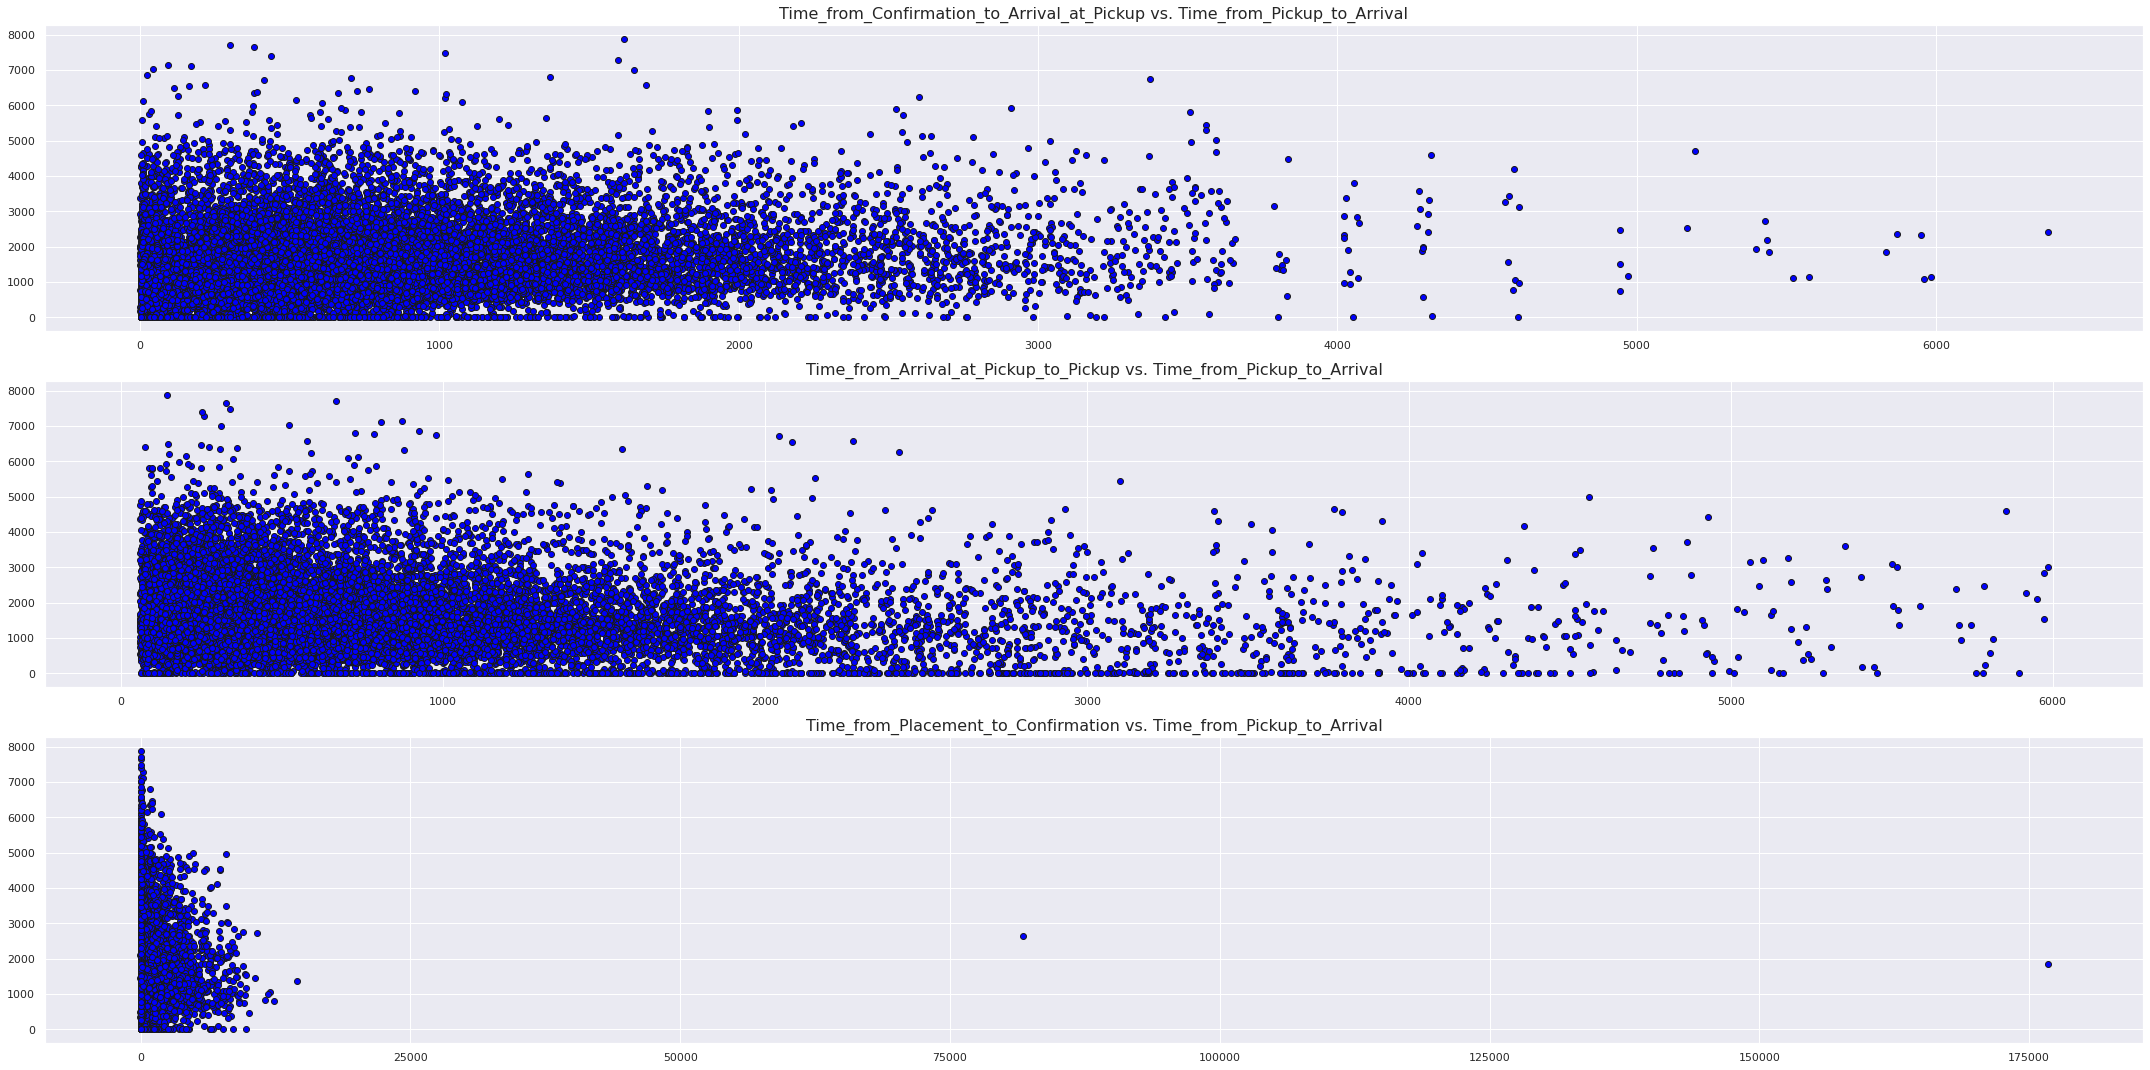

In [33]:
fig, axs = plt.subplots(3,1, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.iloc[:,-3:].columns):
    axs[index-1].set_title("{} vs. Time_from_Pickup_to_Arrival".format(column),fontsize=16)
    axs[index-1].scatter(x=train_set.iloc[:,-3:][column],y=train_set['Time_from_Pickup_to_Arrival'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

Try to explain outliers. 

The 2 outlier entries are because the confirmation and placement days are different. It is a rare occurance (2 out of 21000 entries) 
<font color='orange'> Ask Joanne </font>

### Transforming unseen dataset

In [34]:
# Storing unchanged unseen data in new variable

unseen_set = pd.read_csv('Test.csv')
unseen_set.columns = [col.replace(" ","_") for col in unseen_set.columns] 
unseen_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


<font color='orange'> Ask Joanne about imputing based on test data or must be based on training data or doesn't matter</font>

<font color='green'> Check get dummies, something not clicking

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imputer.fit(unseen_set.iloc[:,-7:-6])
unseen_set.iloc[:,-7:-6] = imputer.transform(unseen_set.iloc[:,-7:-6])

imputer2.fit(unseen_set.iloc[:,-6:-5])
unseen_set.iloc[:,-6:-5] = imputer2.transform(unseen_set.iloc[:,-6:-5])


unseen_set = pd.get_dummies(unseen_set, columns = ['Personal_or_Business', 'Vehicle_Type', 'Platform_Type'], drop_first=True)


unseen_set = unseen_set.set_index('Order_No')

user_id = (unseen_set.groupby('User_Id').count().iloc[:,0])

unseen_set['Total_No_order'] = [float(user_id[unseen_set['User_Id'][i]]) for i in range(len(unseen_set))]
unseen_set = unseen_set.drop(['User_Id'], axis='columns')
unseen_set['Rider_Average_Rating'] = [riders_set[riders_set['Rider Id'] == unseen_set['Rider_Id'][i]]['Average_Rating'].iloc[0] for i in range(len(unseen_set))]
unseen_set = unseen_set.drop(['Rider_Id'], axis=1)




unseen_set['Placement_-_Time'] = pd.to_datetime(unseen_set['Placement_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Confirmation_-_Time'] = pd.to_datetime(unseen_set['Confirmation_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(unseen_set['Arrival_at_Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Pickup_-_Time'] = pd.to_datetime(unseen_set['Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')



unseen_set['Placement_-_Time'] = [unseen_set['Placement_-_Time'][i].replace(month=5, day=unseen_set['Placement_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Confirmation_-_Time'] = [unseen_set['Confirmation_-_Time'][i].replace(month=5, day=unseen_set['Confirmation_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Arrival_at_Pickup_-_Time'] = [unseen_set['Arrival_at_Pickup_-_Time'][i].replace(month=5, day=unseen_set['Arrival_at_Pickup_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Pickup_-_Time'] = [unseen_set['Pickup_-_Time'][i].replace(month=5, day=unseen_set['Pickup_-_Day_of_Month'][i]) for i in range(len(unseen_set))]

# Added data from '...Day_of_Month' columns to '...Time' columns (also affected by day on which order placed, confirmed etc), so can be removed
unseen_set = unseen_set.drop(['Placement_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Pickup_-_Day_of_Month'], axis=1)
unseen_set = unseen_set.drop(['Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Weekday_(Mo_=_1)'], axis=1)


unseen_set['Time_from_Placement_to_Confirmation'] = [(unseen_set['Confirmation_-_Time'][i] - unseen_set['Placement_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]
unseen_set['Time_from_Confirmation_to_Arrival_at_Pickup'] = [(unseen_set['Arrival_at_Pickup_-_Time'][i] - unseen_set['Confirmation_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]
unseen_set['Time_from_Arrival_at_Pickup_to_Pickup'] = [(unseen_set['Pickup_-_Time'][i] - unseen_set['Arrival_at_Pickup_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]

# Information from '...Time' columns now represented in '...from...to...' columns, so can be dropped
unseen_set = unseen_set.drop(['Confirmation_-_Time','Placement_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Pickup_-_Time'], axis=1)

unseen_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
Order_No,,,,,,,,,,,,
Order_No_19248,8,23.24612,0.0,0,0,1,0,44.0,13.3,19.0,515.0,823.0
Order_No_12736,5,23.24612,0.0,0,0,1,0,102.0,14.4,102.0,1270.0,310.0
Order_No_768,5,22.80000,0.0,0,0,1,0,26.0,13.1,1011.0,495.0,1474.0
Order_No_15332,5,24.50000,0.0,0,0,1,0,2.0,13.7,112.0,554.0,851.0
Order_No_21373,6,24.40000,0.0,0,0,1,0,24.0,14.1,257.0,754.0,525.0


In [0]:
# Storing all columns as features

X_test = unseen_set.values

#### Storing dataset as variables

In [37]:
#@title Move response to right end of dataframe
# Reordering dataframe for seperation into independent and dependent variables

dep_var = ['Time_from_Pickup_to_Arrival']
train_set = train_set[[c for c in train_set if c not in dep_var] 
       + dep_var]
train_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Total_No_Orders,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,,,,,
Order_No_4211,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,0,0,1,0,182.0,13.8,264.0,1477.0,1363.0,745
Order_No_25375,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1,0,1,0,8.0,13.6,425.0,1021.0,227.0,1993
Order_No_1899,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,0,0,1,0,162.0,12.5,199.0,410.0,209.0,455
Order_No_9336,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,0,0,1,0,74.0,14.5,31.0,711.0,310.0,1341
Order_No_27883,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1,0,0,0,1.0,14.1,60.0,455.0,90.0,1214


In [0]:
# Storing data as variables

X = train_set.iloc[:, :-1].values
y = train_set.iloc[:, -1].values

In [0]:
unseen_set = unseen_set.drop(['Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long'], axis=1)
train_set = train_set.drop(['Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long'], axis=1)
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


### Building a more accurate model!